## Task: Train an EMNIST classifier

EMNIST (or extended MNIST) is just like MNIST, a bunch of handwritten images, except instead of just digits (0-9) it also has uppercase and lowercase characters.

You are provided with the code to load the EMNIST train and split **datasets**

Write and train a classifier for EMNIST. Make sure to

- Show how your loss(es) dropped during training.
- Show final performance of your model on untrained data.
- Maintain good code quality.

In [ ]:
# Name: Ebrahim Mansour Sharka
# National ID: 1113709248

In [158]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

import torchvision.models as models

import torchvision
from torchvision.datasets import EMNIST
import torchvision.transforms.functional as F
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

In [159]:
seed = 14
train_data = EMNIST(root='emnist_data/', split='byclass', download=True)
test_data = EMNIST(root='emnist_data/', split='byclass', download=True, train=False)

Number of classes in dataset: 62
Unique labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
7


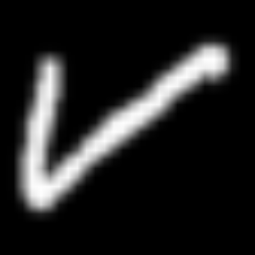

In [160]:
# This cell is for demo purposes. feel free to remove it if you want.
print('Number of classes in dataset:', len(train_data.classes))
print('Unique labels:', train_data.classes)

demo_img, demo_label = train_data[10]

print(demo_label)
torchvision.transforms.functional.resize(demo_img, (255, 255))

In [161]:
# Transformations for the EMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the datasets
train_data = EMNIST(root='emnist_data/', split='byclass', train=True, download=True, transform=transform)
test_data = EMNIST(root='emnist_data/', split='byclass', train=False, download=True, transform=transform)

# Define the size of the subset as a fraction of the original dataset
subset_fraction = 0.1 ## You can play with this to get a bigger or smaller subset

# Create indices for the training subset
train_indices = np.random.choice(len(train_data), int(len(train_data) * subset_fraction), replace=False)

# Create the training subset
train_subset = Subset(train_data, train_indices)

# For the test set, you can do the same or use the full test set
test_indices = np.random.choice(len(test_data), int(len(test_data) * subset_fraction), replace=False)
test_subset = Subset(test_data, test_indices)

# Check the size of the subset
print(f"Training subset size: {len(train_subset)}")
print(f"Test subset size: {len(test_subset)}")

# Define the DataLoaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=32, shuffle=False)

Training subset size: 69793
Test subset size: 11632


In [162]:

class EMNISTClassifier(nn.Module):
    def __init__(self):
        super(EMNISTClassifier, self).__init__()
        self.l1 = nn.Linear(28*28, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 62)  

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.l1(x))
        x = torch.relu(self.l2(x))
        x = self.l3(x)
        return x

In [163]:

model = EMNISTClassifier() 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [164]:
# Check if GPU is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model.to(device)


num_epochs = 100
train_losses = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for iteration, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = outputs.max(1)[1]
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # Calculate and print the average loss and accuracy for the epoch
    epoch_loss = total_loss / (iteration + 1)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch {epoch + 1} - Average Loss: {epoch_loss:.4f}, Average Accuracy: {epoch_accuracy:.2f}%")


cuda
Epoch 1 - Average Loss: 3.7187, Average Accuracy: 13.01%
Epoch 2 - Average Loss: 3.0914, Average Accuracy: 34.47%
Epoch 3 - Average Loss: 2.4615, Average Accuracy: 45.06%
Epoch 4 - Average Loss: 2.0587, Average Accuracy: 50.53%
Epoch 5 - Average Loss: 1.8185, Average Accuracy: 54.33%
Epoch 6 - Average Loss: 1.6618, Average Accuracy: 57.06%
Epoch 7 - Average Loss: 1.5519, Average Accuracy: 59.09%
Epoch 8 - Average Loss: 1.4710, Average Accuracy: 60.52%
Epoch 9 - Average Loss: 1.4054, Average Accuracy: 61.83%
Epoch 10 - Average Loss: 1.3533, Average Accuracy: 62.86%
Epoch 11 - Average Loss: 1.3091, Average Accuracy: 63.86%
Epoch 12 - Average Loss: 1.2723, Average Accuracy: 64.63%
Epoch 13 - Average Loss: 1.2409, Average Accuracy: 65.39%
Epoch 14 - Average Loss: 1.2133, Average Accuracy: 65.91%
Epoch 15 - Average Loss: 1.1896, Average Accuracy: 66.48%
Epoch 16 - Average Loss: 1.1686, Average Accuracy: 67.07%
Epoch 17 - Average Loss: 1.1495, Average Accuracy: 67.54%
Epoch 18 - Average

In [165]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = outputs.max(1)[1]
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Testing/Validation Accuracy {accuracy:.2f}%")

Testing/Validation Accuracy 78.04%
